In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
data_folder = '/home/ubuntu/storage/Doc2Answer/download_from_drive/data/ProcessedCards/'

In [52]:
front_fnms = [fn for fn in sorted(os.listdir(data_folder)) if fn.endswith('a.jpg')]

back_fnms = [fn for fn in sorted(os.listdir(data_folder)) if fn.endswith('b.jpg')]
len(front_fnms), len(back_fnms)

(800, 801)

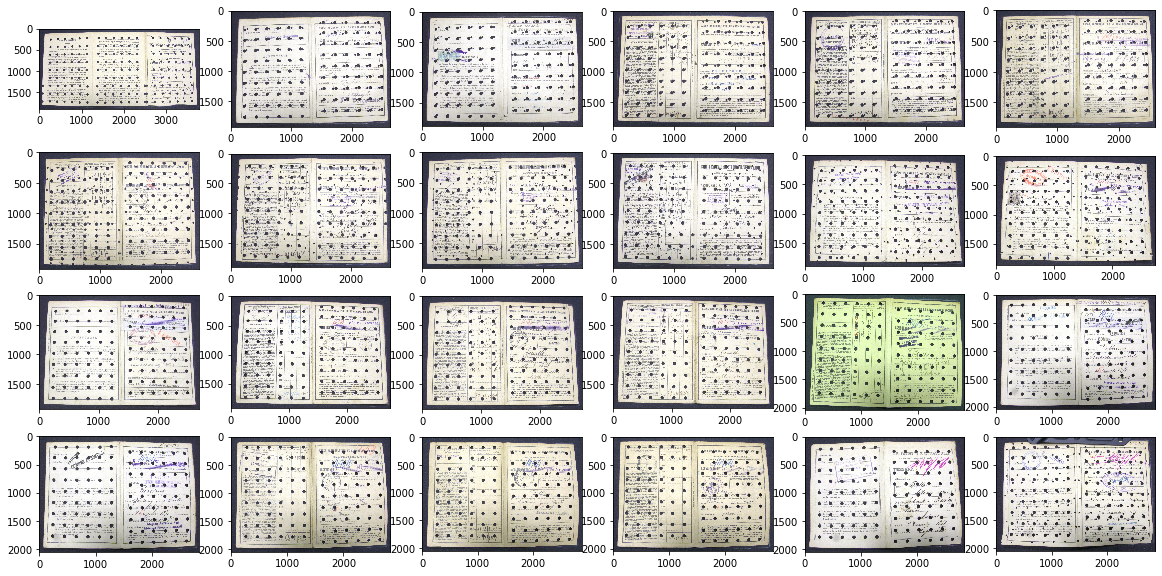

In [25]:
fig, axes = plt.subplots(4, 6, figsize=(20, 10))
for fn, ax in zip(front_fnms[:24], axes.ravel()):
    path = os.path.join(data_folder, fn)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
plt.show()

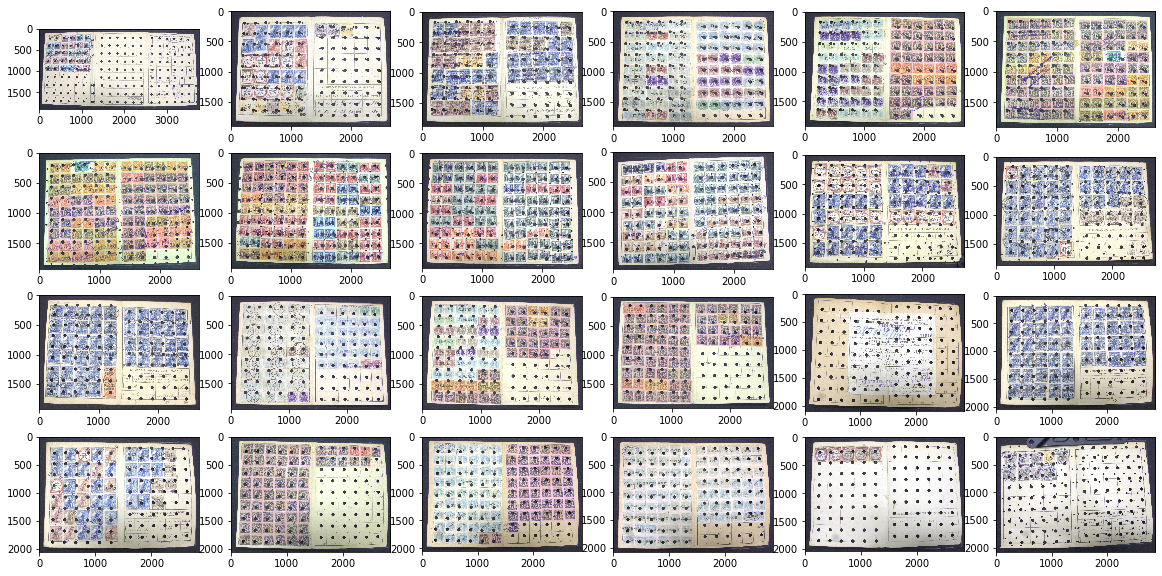

In [26]:
fig, axes = plt.subplots(4, 6, figsize=(20, 10))
for fn, ax in zip(back_fnms[:24], axes.ravel()):
    path = os.path.join(data_folder, fn)
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
plt.show()

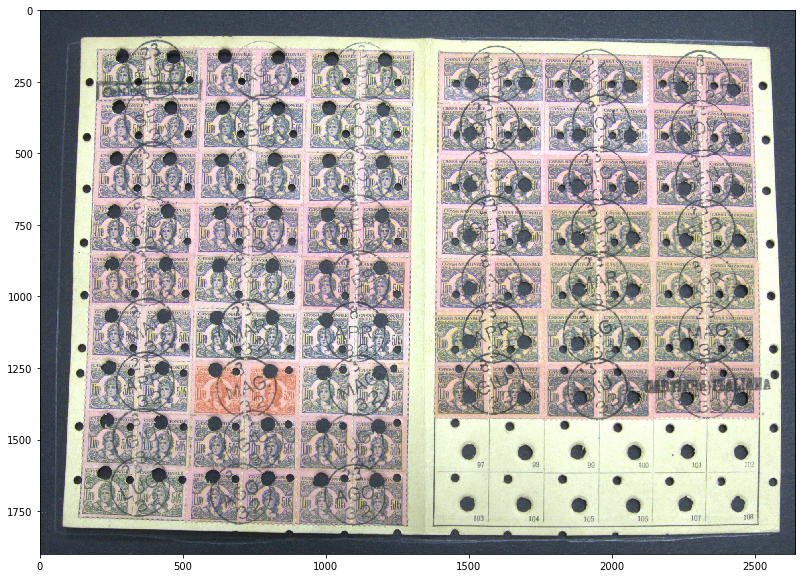

In [41]:
plt.figure(figsize=(20,10))
img_path = os.path.join(data_folder, np.random.choice(back_fnms))
img = plt.imread(img_path)
plt.imshow(img); plt.show()

In [17]:
mask1.ravel().sum()//1000, mask2.ravel().sum()//1000, mask3.ravel().sum()//1000

(1028, 1707, 1191)

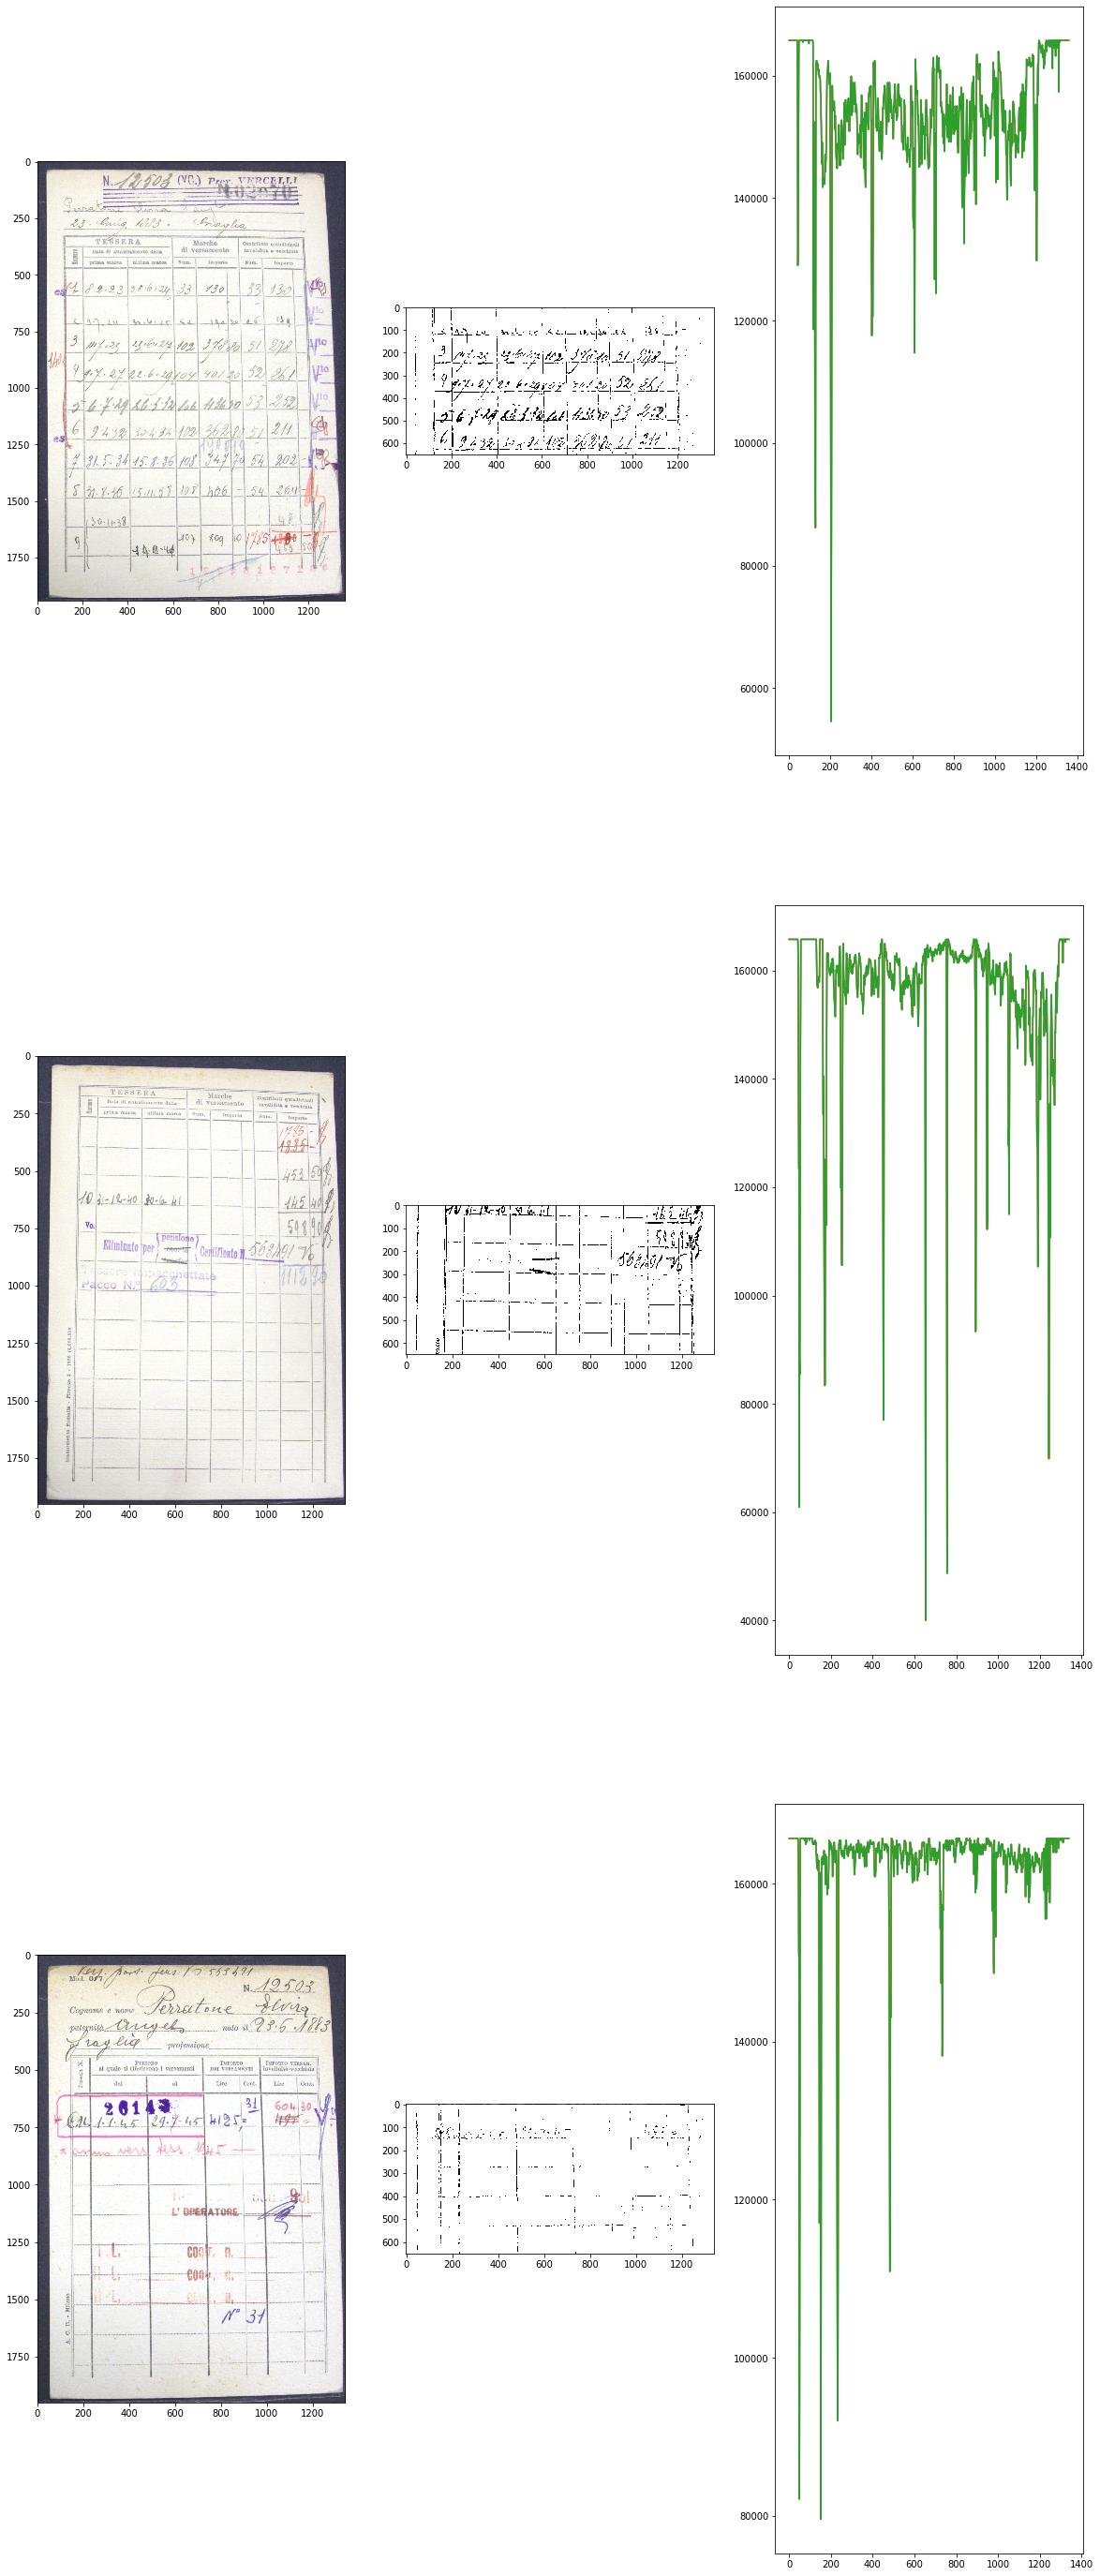

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(20, 50))
for fn, ax in zip(img_fnms[:3], axes):
    path = os.path.join(data_folder, fn)
    oimg = plt.imread(path).copy()
    img = oimg[600:1250].copy()
    mask1 = img.sum(axis=2) < 650
    mask2 = np.abs(img[:,:,0] - img[:,:,1]) < 20
    mask3 = np.abs(img[:,:,0] - img[:,:,2]) < 20
    mask = mask1 * mask2 * mask3
    img[mask] = 0
    img[~mask] = 255
    ax[0].imshow(oimg)
    ax[1].imshow(img)
    ax[2].plot(img.sum(axis=0))
plt.show()

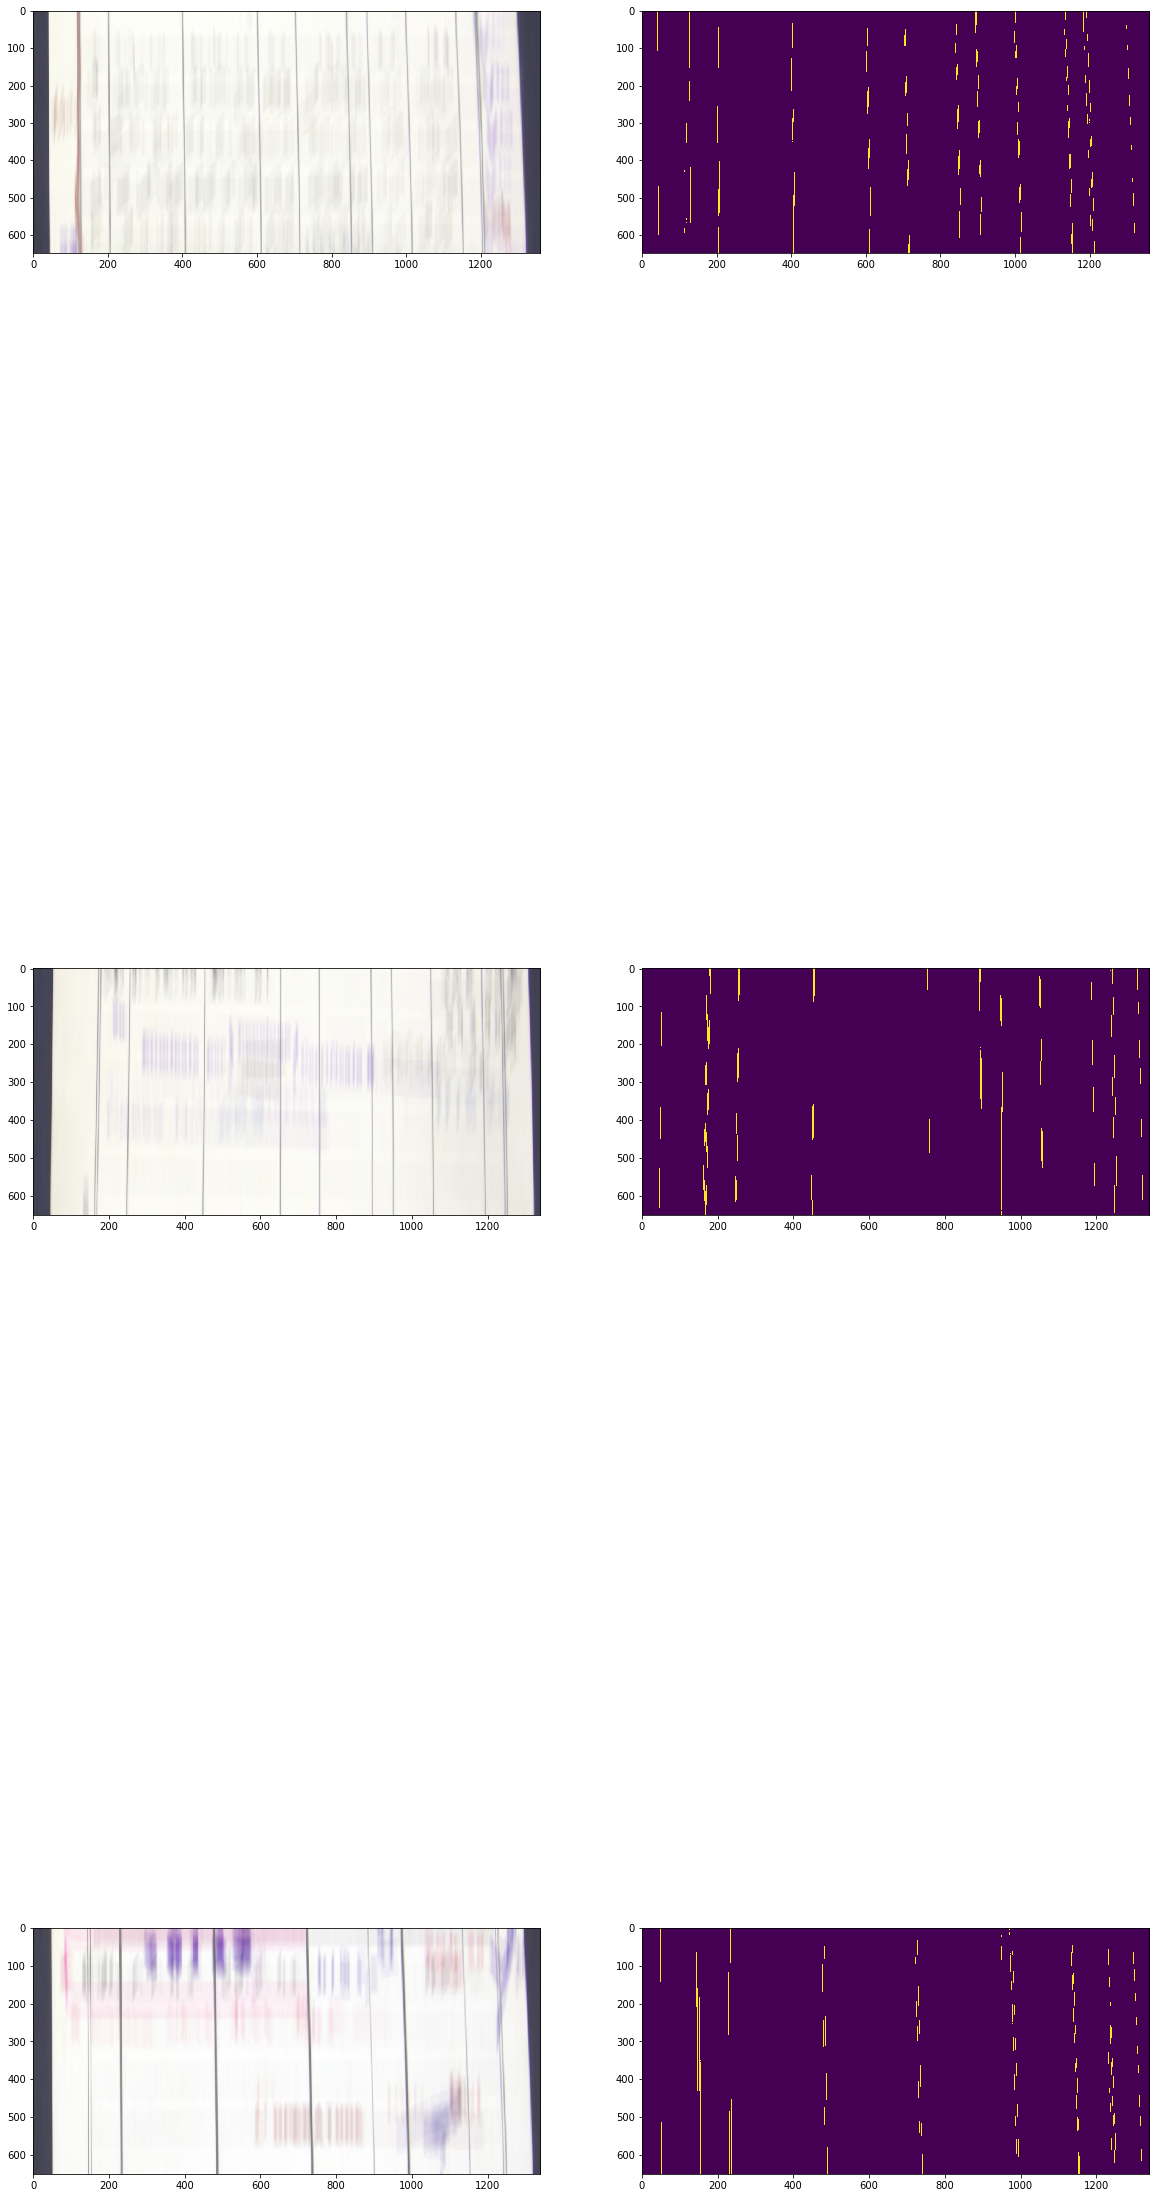

In [79]:
fig, axes = plt.subplots(3, 2, figsize=(20, 50))
for fn, ax in zip(img_fnms[:3], axes):
    path = os.path.join(data_folder, fn)
    oimg = plt.imread(path).copy()
    img = oimg[600:1250].copy()
#     mask1 = img.sum(axis=2) < 700
#     mask2 = np.abs(img[:,:,0] - img[:,:,1]) < 100
#     mask3 = np.abs(img[:,:,0] - img[:,:,2]) < 100
#     mask = mask2 * mask3
#     img[mask] = 0
#     img[~mask] = 255
    
    img = cv2.blur(img, (1, 99))
    edges = cv2.Canny(img, 50, 200)
#     lines = cv2.HoughLinesP(edges,1,np.pi/180,40,minLineLength=30,maxLineGap=5000)
#     for x1,y1,x2,y2 in lines[0]:
#         cv2.line(img,(x1,y1),(x2,y2),(255,0,0),1)
    ax[0].imshow(img)
    ax[1].imshow(edges)
plt.show()